# Physics 404/604

## Computational Physics (Spring 2018)

## BPB-250, Mon./Wed. 2:30-3:45 pm

| Instructor | Prof. Zhaohuan Zhu                 |
| ---------- | :--------------------------------- |
| Email      | zhaohuan.zhu@unlv.edu              |
| Website    | http://www.physics.unlv.edu/~zhzhu |
| Office     | BPB 245                            |



# 1. How to think computationally

Fibonacci number
The number series: 1, 1, 2, 3, 5, 8, 13, 21, 34, …
\begin{equation}
F_{n}=F_{n-1}+F_{n-2}
\end{equation}
What is $F_{n}$?

Solution: there is an analytical solution
\begin{equation}
F_{n}=\frac{\phi^{n}-(1-\phi)^n}{\sqrt{5}}
\end{equation}
where $\phi=\frac{1+\sqrt(5)}{2}$  

## 1.1 Programming guide
* Give the correct answers
* clear and easy to read (including documenting itself)
* easy to use
* built up out of small programs that can be tested individually easy to modify and robust 
* Optimization:  
     1) compilers are very smart now, don’t try to outsmart the compiler (e.g. don’t try loop unrolling)   
     2) instead, use an efficient algorithm (use back of the envelope calculation to estimate the time/memory required), as demonstrated in the Fibonacci example.



## 1.2 Always start with I/O (input/output)

Output:  
 1 .  C way: print command

In [12]:
# Output, print command

a=1
b=2
print('a=',a,', b=',b) # no difference between 'a' and "a", the default seperation is the white space
print('a=',a,', b=',b,sep='') # the default seperation is the sep, here no seperation

a= 1 , b= 2
a=1, b=2


In [17]:
# Old printf way
print("John: %d grade, midterm exam: %6.3f, final exam: %9.1e\n" % (3, 98., 95.5))
#    --------------format string---------------------string modulo operator----Tuple--

#  %d for integer
#  %s for string
#  %a.bf, or %a.be for the floating point number
#   a is the total spaces needed and b is the total digits after the decimal point

John: 3 grade, midterm exam: 98.000, final exam:   9.6e+01



 2 .  Python format way

In [19]:
# New python format way
"John: {0:5d} grade, midterm exam: {1:6.3f}, final exam: {2:9.1e}".format(3, 98., 95.5) 
# template.fomat(arguments), the curly braces in the template will be substituted with the value from arguments
# 0, 1, 2 in the curly braces are the position parameter 


'John:     3 grade, midterm exam: 98.000, final exam:   9.6e+01'

In [22]:
"John: {} grade, midterm exam: {}, final exam: {}".format(3, 98., 95.5)  # default position and format

'John: 3 grade, midterm exam: 98.0, final exam: 95.5'

In [31]:
"John: {a:5d} grade, midterm exam: {b:6.3f}, \'final exam:\' {c:9.1e}".format(a=3, b=98., c=95.5)  #use keyword parameter

"John:     3 grade, midterm exam: 98.000, 'final exam:'   9.6e+01"

In [30]:
a=3
b=98.
c=95.5
"John: {:5d} grade, midterm exam: {:6.3f}, final exam: {:9.1e}".format(a,b,c) # default position

'John:     3 grade, midterm exam: 98.000, final exam:   9.6e+01'

Input  

1 . Input from Keyboard  
      Input function

In [55]:
student1 = input("name, midterm, final") # read in a string
[name, mid, final]=student1.split() # split the string to name, midterm and final
mid,final=[float(mid),float(final)] # change the string to the float type
print("The student %s got %6.2f for the mid-exam and %6.2f for the final exam" % (name,mid,final))
print(type(mid))

name, midterm, finalJoe 90. 95.
The student Joe got  90.00 for the mid-exam and  95.00 for the final exam
<class 'float'>




2 .  reading from a file, 

     1.1 strings
     suppose test.dat is 'Monday\nTuesday\nWednesday\nThursday\nFriday\nSaturday\nSunday\n'   

     f=open('test.dat','r')  
     f.read()  # read the entire file 'Monday\nTuesday\nWednesday\nThursday\nFriday\nSaturday\nSunday\n'  
     
     or  f.readline()  # just read one line 'Monday\n'  
     
     or  f.readlines() # each line is read seperately ['Monday\n', 'Tuesday\n', 'Wednesday\n', 'Thursday\n', 'Friday\n', 'Saturday\n', 'Sunday\n']
     
     1.2 numbers
     suppose test.dat is '1 2 3 \n 4 5 6 \n 7 8 9'
     
     with open('test.dat') as f:
        for line in f:  #line is a string
           #split the string on whitespace, return a list of numbers (as strings)
           numbers_str = line.split()
           #convert numbers to floats
           numbers_float = [float(x) for x in numbers_str]  #map(float,numbers_str) works too

In [44]:
with open('test.dat') as f:
    for line in f:
        print(line)
        str=line.split()
        print(str)
        num=[float(x) for x in str]
        print(num)

1 2 3

['1', '2', '3']
[1.0, 2.0, 3.0]
4 5 6

['4', '5', '6']
[4.0, 5.0, 6.0]
7 8 9

['7', '8', '9']
[7.0, 8.0, 9.0]


## 1.3 Functions to calculate Fibonacci numbers

### 1.3.1 Direct Calculation:

In [1]:
import numpy as np  # simple and fast, good for small n, for big n, numbers are truncated to 16 digits due to the round off error of sqrt
def fib1(n):
    phi=(1.+np.sqrt(5))/2.
    return (phi**n-(1.-phi)**n)/np.sqrt(5.)

In [19]:
import time
start_time = time.time()
print(fib1(40))
print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
print(fib1(1400)) # 1500 too much
print("--- %s seconds ---" % (time.time() - start_time))

102334155.00000013
--- 0.002814769744873047 seconds ---
1.7108476902341032e+292
--- 0.00014734268188476562 seconds ---




### 1.3.2 Recursion method:

In [1]:
# Recursion
def fib2(n):      # extremely simple, but exponentially running time, very slow for large n, n cannot too large (stack limit)
    if n == 0: return 0
    elif n == 1: return 1
    else: return fib2(n-1)+fib2(n-2)

In [68]:
import time
start_time = time.time()
print(fib2(40))
print("--- %s seconds ---" % (time.time() - start_time))

102334155
--- 49.60917401313782 seconds ---


Dynamic Programming:  
An algorithmic paradigm that solves a complex problem by breaking it into subproblems and stores the results of subproblems to avoid computing the same results again.

### 1.3.3 Memorization method (Top down):

In [29]:
# Memorization
#M = {0: 0, 1: 1} # dictionary

#def fib3(n):  # Store the data we already calculated, linear space and time complexity, but still have the stack limit
#    if n in M:
#        return M[n]
#    M[n] = fib3(n - 1) + fib3(n - 2)
#    return M[n]

In [7]:
def fib3(n, table): # Store the data we already calculated, linear space and time complexity, but still have the stack limit
    if n == 0 or n==1:
        table[n]=n
    
    # if the value has not been calculated, calculate it 
    if table[n] is None:
        table[n] = fib3(n-1, table) + fib3(n-2, table)
        
    return table[n]

In [11]:
import time
n=40
table = [None]*(n+1)
start_time = time.time()
print(fib3(n, table))
print("--- %s seconds ---" % (time.time() - start_time))
n=1400     # n=14000 won't work due to the finite number of stack
table = [None]*(n+1)
start_time = time.time()
print(fib3(n, table))
print("--- %s seconds ---" % (time.time() - start_time))

102334155
--- 0.0003802776336669922 seconds ---
17108476902340227241249719513231821477382749898026920041550883749834348017250935801359315038923367841494936038231522506358371361016671790887791259870264957823133253627917432203111969704623229384763490617075388642696139893354058660570399927047816296952516330636633851111646387885472698683607925
--- 0.0012938976287841797 seconds ---


### 1.3.4  Tabulation Method (bottom-up)


In [6]:
def fib4(n):      # fast, no stack limit
    table=[0]*(n+1)
    table[1] = 1
    
    for i in range(2,n+1):
        table[i]=table[i-1]+table[i-2]
    return table[n]

In [3]:
import time
start_time = time.time()
print(fib4(40))
print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
print(fib4(140000)) 
print("--- %s seconds ---" % (time.time() - start_time))

102334155
--- 0.0004849433898925781 seconds ---
8320510918914115099855124814790379424996942038576128405638376812894032815904135502431081682525574460190882794559452332671320172286475022533189544244704262290935275703034783845400532591105340964920068779664365789206502363883995812796411755071756665232455162579388537386349191844452565502252313599063066656262486313787399244625030848498654804013334510110798862749656861086514860920701373166038731759901904966882328430901924772658439621451970341689020864428307476021834920186069772614243899791998127058296705481974077815589449757226241202350171480800900196155338563778223278825631007998220308797238900494516334017761636068310576649274866165524203752617938518942095401921515270110919973891394898717311947268523058900167818364493174910389024008339885731207914187767814681941777849281416111850678401813448543598320904001875810445864467896596741823815133381815635148522939963711724910032289134564662263601636220605492849685762887851849077924323543095642231310

## 1.3.5 Using Matrix Algebra

In [7]:
def arrpow(arr, n): # calculate 2x2 array to the nth power.
    yarr=arr
    if n<1:
        print('n needs to be larger than 1')
    if n==1:
        return arr
    yarr = arrpow(arr, n//2)
    yarr = [[yarr[0][0]*yarr[0][0]+yarr[0][1]*yarr[1][0],yarr[0][0]*yarr[0][1]+yarr[0][1]*yarr[1][1]], # array multiply itself
            [yarr[1][0]*yarr[0][0]+yarr[1][1]*yarr[1][0],yarr[1][0]*yarr[0][1]+yarr[1][1]*yarr[1][1]]]
    if n%2:   # if n is an odd number, multiple another arr
        yarr=[[yarr[0][0]*arr[0][0]+yarr[0][1]*arr[1][0],yarr[0][0]*arr[0][1]+yarr[0][1]*arr[1][1]],
            [yarr[1][0]*arr[0][0]+yarr[1][1]*arr[1][0],yarr[1][0]*arr[0][1]+yarr[1][1]*arr[1][1]]]
    return yarr

def fib5(n):   # the fastest method
    arr= [[1,1],[1,0]]
    f=arrpow(arr,n-1)[0][0]  #0 0 component is Fn#
    return f
    



In [53]:
# import numpy as np

# def arrpow(arr, n):
#    yarr=arr
#    if n<1:
#        print('n needs to be larger than 1')
#    if n==1:
#        return arr
#    yarr = arrpow(arr, n//2)
#    yarr = np.matmul(yarr,yarr)
#    if n%2:
#        yarr=np.matmul(yarr,arr)
#    return yarr

#def fib5(n):
#    arr= [[1,1],[1,0]]
#    f=arrpow(arr,n-1)[0][0]
#    return f
    


In [6]:
import time
start_time = time.time()
print(fib5(40))
print("--- %s seconds ---" % (time.time() - start_time))
import time
start_time = time.time()
print(fib5(140000)) # 
print("--- %s seconds ---" % (time.time() - start_time))

102334155
--- 0.0008969306945800781 seconds ---
8320510918914115099855124814790379424996942038576128405638376812894032815904135502431081682525574460190882794559452332671320172286475022533189544244704262290935275703034783845400532591105340964920068779664365789206502363883995812796411755071756665232455162579388537386349191844452565502252313599063066656262486313787399244625030848498654804013334510110798862749656861086514860920701373166038731759901904966882328430901924772658439621451970341689020864428307476021834920186069772614243899791998127058296705481974077815589449757226241202350171480800900196155338563778223278825631007998220308797238900494516334017761636068310576649274866165524203752617938518942095401921515270110919973891394898717311947268523058900167818364493174910389024008339885731207914187767814681941777849281416111850678401813448543598320904001875810445864467896596741823815133381815635148522939963711724910032289134564662263601636220605492849685762887851849077924323543095642231310

In [8]:
import numpy as np
import time
iarray2=np.array([])
timearray2=np.array([])
iarray4=np.array([])
timearray4=np.array([])
iarray5=np.array([])
timearray5=np.array([])

for i in 10**np.arange(1.,6.,0.1):
    start_time = time.time()
    fib2(int(i))
    time2=time.time() - start_time
    iarray2=np.append(iarray2,int(i))
    timearray2=np.append(timearray2,time2)
    print(time2)
    if time2 > 10.:
        break
        
for i in 10**np.arange(1.,6.,0.1):
    start_time = time.time()
    fib4(int(i))
    time4=time.time() - start_time
    iarray4=np.append(iarray4,int(i))
    timearray4=np.append(timearray4,time4)
    print(time4)
    if time4 > 10.:
        break
        
for i in 10**np.arange(1.,6.,0.1):
    start_time = time.time()
    fib5(int(i))
    time5=time.time() - start_time
    iarray5=np.append(iarray5,int(i))
    timearray5=np.append(timearray5,time5)
    print(time5)
    if time5 > 10.:
        break

2.7894973754882812e-05
7.295608520507812e-05
0.0004622936248779297
0.0038270950317382812
0.037680864334106445
0.5438473224639893
28.155627012252808
8.821487426757812e-06
5.0067901611328125e-06
5.245208740234375e-06
5.7220458984375e-06
5.7220458984375e-06
9.775161743164062e-06
1.0013580322265625e-05
1.2159347534179688e-05
1.0013580322265625e-05
1.1920928955078125e-05
1.5020370483398438e-05
1.7881393432617188e-05
2.2172927856445312e-05
2.7179718017578125e-05
3.409385681152344e-05
4.482269287109375e-05
5.698204040527344e-05
7.414817810058594e-05
9.393692016601562e-05
0.0001270771026611328
0.0001659393310546875
0.000225067138671875
0.0002961158752441406
0.0004329681396484375
0.0006020069122314453
0.0009140968322753906
0.001035928726196289
0.0013458728790283203
0.001859903335571289
0.003595113754272461
0.00512385368347168
0.0075838565826416016
0.011574029922485352
0.018967866897583008
0.026637792587280273
0.044126033782958984
0.0818328857421875
0.11220192909240723
0.19064116477966309
0.3527

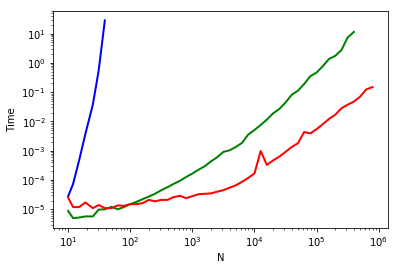

In [18]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(iarray2,timearray2 , 'b-', lw=2)   
plt.plot(iarray4,timearray4 , 'g-', lw=2) 
plt.plot(iarray5,timearray5 , 'r-', lw=2) 
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('Time')
plt.show()

In [17]:
print(iarray5)

[1.00000e+01 1.20000e+01 1.50000e+01 1.90000e+01 2.50000e+01 3.10000e+01
 3.90000e+01 5.00000e+01 6.30000e+01 7.90000e+01 1.00000e+02 1.25000e+02
 1.58000e+02 1.99000e+02 2.51000e+02 3.16000e+02 3.98000e+02 5.01000e+02
 6.30000e+02 7.94000e+02 1.00000e+03 1.25800e+03 1.58400e+03 1.99500e+03
 2.51100e+03 3.16200e+03 3.98100e+03 5.01100e+03 6.30900e+03 7.94300e+03
 1.00000e+04 1.25890e+04 1.58480e+04 1.99520e+04 2.51180e+04 3.16220e+04
 3.98100e+04 5.01180e+04 6.30950e+04 7.94320e+04 1.00000e+05 1.25892e+05
 1.58489e+05 1.99526e+05 2.51188e+05 3.16227e+05 3.98107e+05 5.01187e+05
 6.30957e+05 7.94328e+05]
